In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [2]:
#splitting the data into training and test data

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    total_size = len(os.listdir(SOURCE))
    images = os.listdir(SOURCE)
    random.sample(images, total_size)
    train_imgs = images[:int(total_size*SPLIT_SIZE)]
    test_imgs = images[int(total_size*SPLIT_SIZE):]
    
    for i in train_imgs:
        img_src = os.path.join(SOURCE, i)
        img_dest = os.path.join(TRAINING, i)
        if(os.path.getsize(img_src) > 0):
            copyfile(img_src, img_dest)
    
    for i in test_imgs:
        img_src = os.path.join(SOURCE, i)
        img_dest = os.path.join(TESTING, i)
        if(os.path.getsize(img_src) > 0):
            copyfile(img_src, img_dest)              

        
#     [copyfile(os.path.join(SOURCE, i), os.path.join(TRAINING, i) ) for i in train_imgs]
#     [copyfile(os.path.join(SOURCE, i), os.path.join(TESTING, i) ) for i in test_imgs]
    
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogQs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

#split percentaage
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/PetImages/Cat/'

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(550, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [3]:
# loading image with data augmentation
# data augmentation helps in reducing overfitting
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(300, 300))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2
                                        horizontal_flip=True,
                                        fill_mode='nearest)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(300, 300))

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/cats-v-dogs/training/'

In [53]:
#steps per epoch = total training data / batch_size
history = model.fit_generator(train_generator,
                              steps_per_epoch=100, #batch_size * steps = training_data
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              validation_step=50 #batch_size * steps = validation data
                             )


Epoch 1/2
270/270 [==============================] - 53s 196ms/step - loss: 0.6903 - acc: 0.5274 - val_loss: 0.6644 - val_acc: 0.5867
Epoch 2/2
270/270 [==============================] - 51s 189ms/step - loss: 0.6309 - acc: 0.6422 - val_loss: 0.5907 - val_acc: 0.6867


Text(0.5, 1.0, 'Training and validation loss')

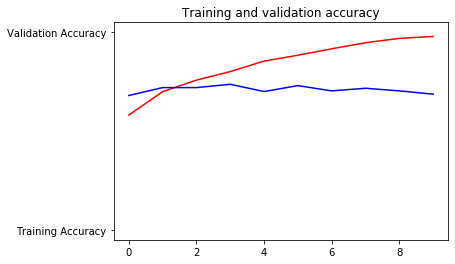

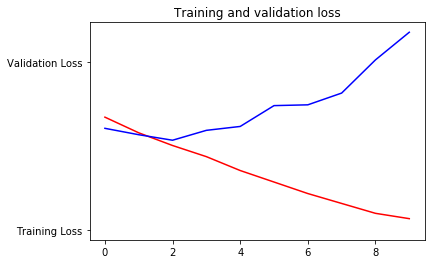

In [37]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.legend()
plt.title('Training and validation loss')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for imgs in uploaded.keys():
    path = '/content/' + imgs
    img = image.load_img(path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    processed_img = np.vstack([img])
    classes = model.predict(processed_img, batch_size=10)

    print(classes[0])
    if (classes[0] > 0):
        print('it is a dog')
    else:
        print('it is a cat(neko)😺')
        

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);